/Users/huziy/virtualenvs/py3.5/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/huziy/virtualenvs/py3.5/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


-14595245870.9 14607245871.5
-14597251428.2 14605251429.4
(1800, 3600) (1800, 3600) (1800, 3600)


/Users/huziy/virtualenvs/py3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3427: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/huziy/virtualenvs/py3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3436: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


--


{-30: ([<matplotlib.lines.Line2D at 0x107339fd0>], []),
 -20: ([<matplotlib.lines.Line2D at 0x10733f8d0>], []),
 -10: ([<matplotlib.lines.Line2D at 0x10733ffd0>], []),
 0: ([<matplotlib.lines.Line2D at 0x1073448d0>], []),
 10: ([<matplotlib.lines.Line2D at 0x107344fd0>], []),
 20: ([<matplotlib.lines.Line2D at 0x10734a8d0>], []),
 30: ([<matplotlib.lines.Line2D at 0x10734afd0>], [])}

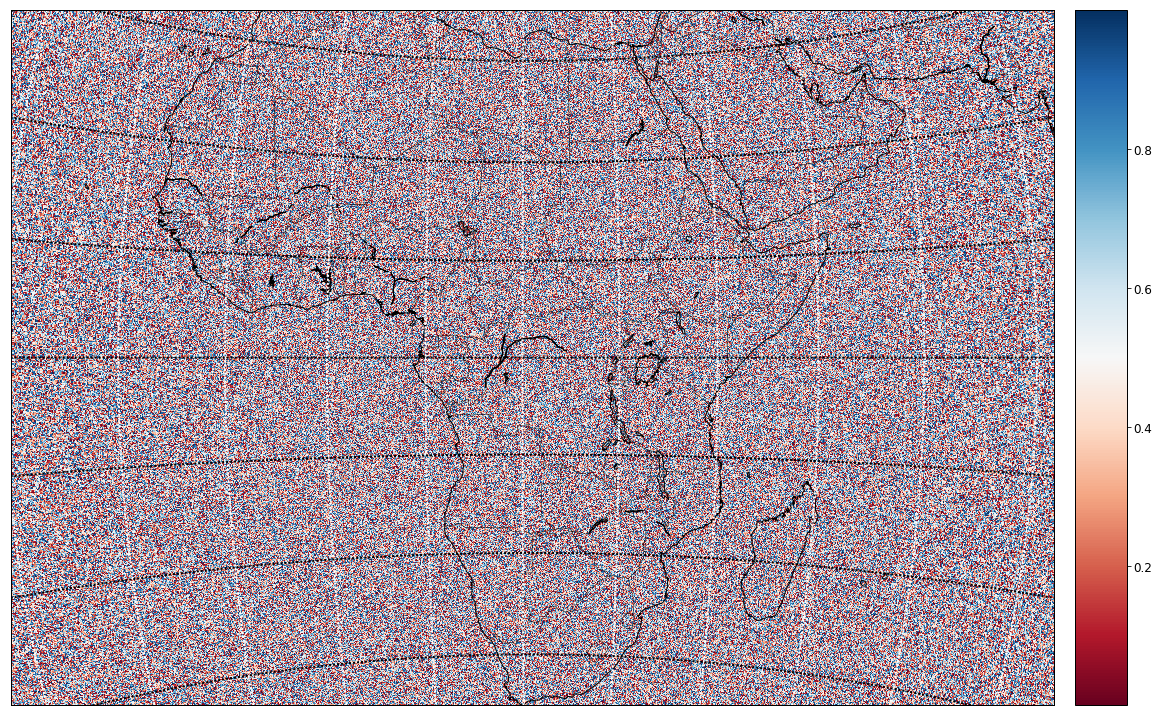

In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))
lons = np.arange(-179.95, 180.01, 0.1)
lats = np.arange(-89.95, 90.01, 0.1)



m = Basemap(width=12000000, height=8000000,
                resolution='l', projection='stere',
                lat_ts=0, lat_0=0, lon_0=21
)
    # m = Basemap(width=9000000, height=9000000,
    #             projection='aeqd', lat_0=0, lon_0=1)
data = np.random.random((1800, 3600))
lons, lats = np.meshgrid(lons, lats)
x, y = m(lons, lats)


data = np.ma.masked_where((x < m.xmin) | (x > m.xmax) | (y < m.ymin) | (y > m.ymax), data)


print(x.min(), x.max())
print(y.min(), y.max())

print(x.shape, y.shape, data.shape)
im = m.pcolormesh(x, y, data,
             latlon=False, cmap='RdBu')
# m.imshow(np.flipud(anom)[1500:2470,600:1200])
m.colorbar(im)
print(data[-1, -1])
m.drawcoastlines()
m.drawcountries()
m.drawmeridians(np.arange(-180, 190, 10), [1, 1, 1, 1], linewidth=2)
m.drawparallels(np.arange(-90, 100, 10), linewidth=2)
# plt.show()